This notebook is utilized for show the detection of faces and facial landmarks

First, imports the libraries:

```Python
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt

from scipy.spatial import distance as dist

from io import BytesIO
from IPython.display import clear_output, Image, display
from PIL import Image as Img
```

In [2]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt

from scipy.spatial import distance as dist

from io import BytesIO
from IPython.display import clear_output, Image, display
from PIL import Image as Img

Second, load one image with people.

In [3]:
imagem_turma = cv2.imread('imagens/ecp2021.jpg')

Visualize the image with plt.imshow()

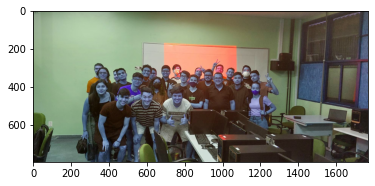

In [4]:
plt.imshow(imagem_turma)

Convert the image to grayscale and store it in another variable

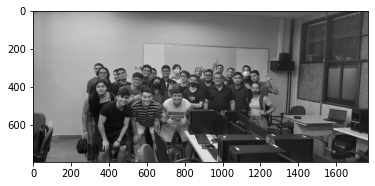

In [5]:
turma_gray = cv2.cvtColor(imagem_turma, cv2.COLOR_BGR2GRAY)
plt.imshow(turma_gray, cmap='gray')

Load the classifier haarcascade_frontalface_default.xml with the code `classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")`

In [6]:
classifier = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

Detecter the faces with method `detectMultiScale(imagem_gray, 1.3, 10)` of `classifier` and store in variable faces.

In [7]:
faces = classifier.detectMultiScale(turma_gray, 1.3, 10)

View the number of faces with `len(faces)`

In [8]:
len(faces)

10

Make one copy of image

In [9]:
turma2 = imagem_turma.copy()
turma2 = cv2.cvtColor(turma2, cv2.COLOR_BGR2RGB)

Draw the rectangles on the face with the code:
```Python
for (x,y,w,h) in faces:
    cv2.rectangle(imga, (x,y), (x+w, y+h), (255, 255, 0), 2)
```

In [10]:
for x, y, w, h in faces:
    cv2.rectangle(turma2, (x,y), (x+w, y+h), (255, 255, 0), 2)

Visualize the image.

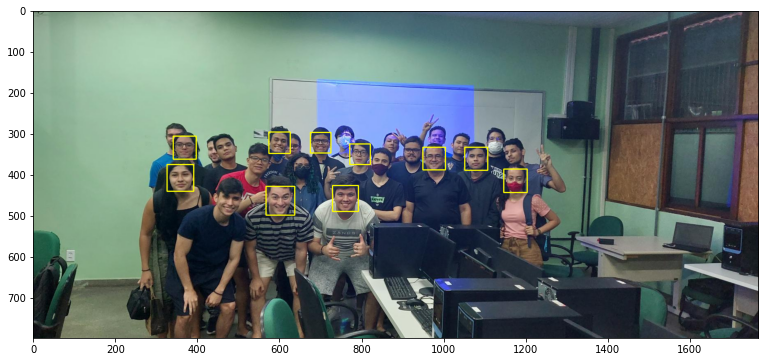

In [11]:
plt.figure(figsize=(13,13))
plt.imshow(turma2)

Save the faces in separate files
```Python
face_imagem = 0

for (x,y,w,h) in faces:
    face_imagem += 1
    imagem_roi = imagem[y:y+h, x:x+w]
    imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite("face_" + str(face_imagem) + ".png", imagem_roi)
```

In [12]:
face_qtd = 0

for x, y, w, h in faces:
    face_qtd += 1
    imagem_roi = turma2[y:y+h, x:x+w]
    imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite("face_" + str(face_qtd) + ".png", imagem_roi)

Use a classifier from the dlib library
```Python
classificador_dlib_68_path = "shape_predictor_68_face_landmarks.dat"
classificador_dlib = dlib.shape_predictor(classificador_dlib_68_path)
detector_face = dlib.get_frontal_face_detector()
```

In [13]:
classificador_dlib = dlib.shape_predictor('classificadores/shape_predictor_68_face_landmarks.dat')
detector_face = dlib.get_frontal_face_detector()

Build the function annotate face
```Python
def annotate_face(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for k, d in enumerate(retangulos):
        print("Identificado rosto " + str(k))
        cv2.rectangle(imagem, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 2)
    
    return imagem
```

In [13]:
def annotate_face(imagem):
    retangulos = detector_face(imagem, 1)

    if len(retangulos) == 0:
        return None

    for k, d in enumerate(retangulos):
        print("Identificado rosto " + str(k))
        cv2.rectangle(imagem, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 2)

    return imagem

Apply the function

In [14]:
turma3 = imagem_turma.copy()
turma3 = cv2.cvtColor(turma3, cv2.COLOR_BGR2RGB)
faces = annotate_face(turma3)

Identificado rosto 0
Identificado rosto 1
Identificado rosto 2
Identificado rosto 3
Identificado rosto 4
Identificado rosto 5
Identificado rosto 6
Identificado rosto 7
Identificado rosto 8
Identificado rosto 9
Identificado rosto 10
Identificado rosto 11
Identificado rosto 12
Identificado rosto 13
Identificado rosto 14
Identificado rosto 15
Identificado rosto 16
Identificado rosto 17


Visualize the annotate image:

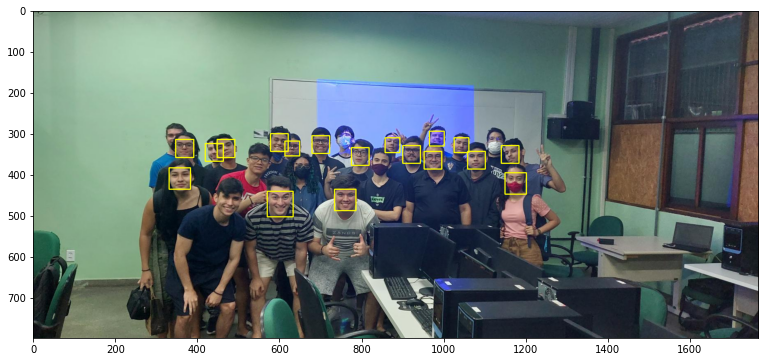

In [15]:
plt.figure(figsize = (13,13))
plt.imshow(turma3)

Get the facial points with the method:

```Python
def face_landmark(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    marcos = []
    
    for ret in retangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in classificador_dlib(imagem,ret).parts()]))
    
    return marcos
```

In [16]:
def face_landmark(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    marcos = []
    
    for ret in retangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in classificador_dlib(imagem,ret).parts()]))
    
    return marcos

Load a image with face of one person

In [17]:
gabriel = cv2.imread('imagens/gabriel.jpeg')
gabriel = cv2.cvtColor(gabriel, cv2.COLOR_BGR2RGB)
marcos_gabriel = face_landmark(gabriel)

Visualize the image

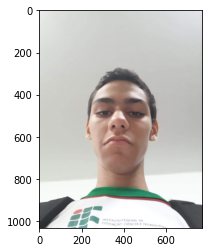

In [18]:
plt.imshow(gabriel)

Use the function that marks facial points

Apply the facial points
```Python
def anotar_marcos_faciais(imagem, marcos):
    
    for marco in marcos:
        for idx, ponto in enumerate(marco):
            centro = (ponto[0,0], ponto[0,1])
            cv2.circle(imagem, centro, 3, (255,255,0), -1)
            cv2.putText(imagem, str(idx), centro, cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                       (255,255,255), 2)
    
    return imagem
```

In [19]:
def anotar_marcos_faciais(imagem, marcos):

    for marco in marcos:
        for idx, ponto in enumerate(marco):
            centro = (ponto[0,0], ponto[0,1])
            cv2.circle(imagem, centro, 3, (255,255,0), -1)
            cv2.putText(imagem, str(idx), centro, cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                       (255,255,255), 2)

    return imagem

In [20]:
gabriel_marcos = anotar_marcos_faciais(gabriel.copy(), marcos_gabriel)

Visualize the image

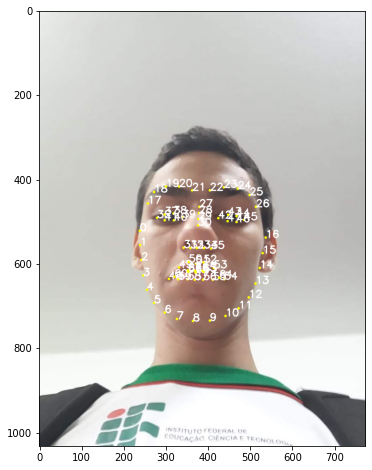

In [21]:
plt.figure(figsize = (8,8))
plt.imshow(gabriel_marcos);

Separation of facial points
```Python
FACE = list(range(17, 68))
FACE_COMPLETA = list(range(0, 68))
LABIO = list(range(48, 61))
SOMBRANCELHA_DIRETA = list(range(17, 22))
SOMBRANCELHA_ESQUERDA = list(range(22, 27))
OLHO_DIREITO = list(range(36,42))
OLHO_ESQUERDO = list(range(42,48))
NARIZ = list(range(27,35))
MANDIBULA = list(range(0,17))
```

In [22]:
FACE = list(range(17, 68))
FACE_COMPLETA = list(range(0, 68))
LABIO = list(range(48, 61))
SOMBRANCELHA_DIRETA = list(range(17, 22))
SOMBRANCELHA_ESQUERDA = list(range(22, 27))
OLHO_DIREITO = list(range(36,42))
OLHO_ESQUERDO = list(range(42,48))
NARIZ = list(range(27,35))
MANDIBULA = list(range(0,17))

# Abertura do olhos

Use the following method to determine the eye opening:
```Python
def aspecto_razao_olhos(pontos_olhos_in):
    pontos_olhos = np.array(pontos_olhos_in)
    a = dist.euclidean(pontos_olhos[1], pontos_olhos[5])
    b = dist.euclidean(pontos_olhos[2], pontos_olhos[4])
    c = dist.euclidean(pontos_olhos[0], pontos_olhos[3])
    
    aspecto_razao = (a + b)/(2.0 * c)
    
    return aspecto_razao
```

In [23]:
def aspecto_razao_olhos(pontos_olhos_in):
    pontos_olhos = np.array(pontos_olhos_in)
    a = dist.euclidean(pontos_olhos[1], pontos_olhos[5])
    b = dist.euclidean(pontos_olhos[2], pontos_olhos[4])
    c = dist.euclidean(pontos_olhos[0], pontos_olhos[3])

    aspecto_razao = (a + b)/(2.0 * c)

    return aspecto_razao

Upload an image of a smiling person

In [24]:
sorriso = cv2.imread('imagens/sorriso.jpeg')
sorriso = cv2.cvtColor(sorriso, cv2.COLOR_BGR2RGB)

Visualize the image

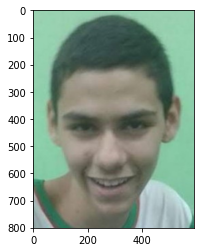

In [25]:
plt.imshow(sorriso);

Obtenha os pontos faciais

In [26]:
marcos_sorriso = face_landmark(sorriso)
sorriso_marcos = anotar_marcos_faciais(sorriso.copy(), marcos_sorriso)

Visualize os pontos faciais

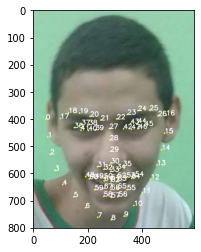

In [27]:
plt.imshow(sorriso_marcos);

Determine and visualize the eye opening

Left eye

In [52]:
aspecto_esquerdo = aspecto_razao_olhos(marcos_sorriso[0][36:42])
marcos_olho_esquerdo = [marcos_sorriso[0][36:42]]
sorriso_marcos = anotar_marcos_faciais(sorriso.copy(), marcos_olho_esquerdo)

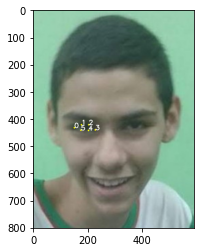

In [53]:
plt.imshow(sorriso_marcos);

right eye

In [58]:
aspecto_direita = aspecto_razao_olhos(marcos_sorriso[0][42:48])
marcos_olho_direito = [marcos_sorriso[0][42:48]]
sorriso_marcos = anotar_marcos_faciais(sorriso.copy(), marcos_olho_direito)

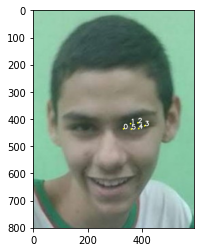

In [59]:
plt.imshow(sorriso_marcos);

# Challenges

Get the mouth opening, using the following function:
```Python
def aspecto_razao_boca(pontos_boca_in):
    pontos_boca = np.array(pontos_boca_in)
    a = dist.euclidean(pontos_boca[3], pontos_boca[9])
    b = dist.euclidean(pontos_boca[2], pontos_boca[10])
    c = dist.euclidean(pontos_boca[4], pontos_boca[8])
    d = dist.euclidean(pontos_boca[0], pontos_boca[6])
    
    aspecto_razao = (a + b + c)/(3.0*d)
    
    return aspecto_razao
```

Draw a convex shell on the mouth and eyes using the function
```Python
def anotar_marcos_casca_convexa(imagem, marcos):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for idx, ret in enumerate(retangulos):
        marco = marcos[idx]
        
        pontos = cv2.convexHull(marco)
        cv2.drawContours(imagem, [pontos], 0, (0,255,0), 2)
    
    return imagem
```

Add these functions in Cameo

In [60]:
def aspecto_razao_boca(pontos_boca_in):
    pontos_boca = np.array(pontos_boca_in)
    a = dist.euclidean(pontos_boca[3], pontos_boca[9])
    b = dist.euclidean(pontos_boca[2], pontos_boca[10])
    c = dist.euclidean(pontos_boca[4], pontos_boca[8])
    d = dist.euclidean(pontos_boca[0], pontos_boca[6])

    aspecto_razao = (a + b + c)/(3.0*d)

    return aspecto_razao

In [61]:
def anotar_marcos_casca_convexa(imagem, marcos):
    retangulos = detector_face(imagem, 1)

    if len(retangulos) == 0:
        return None

    for idx, ret in enumerate(retangulos):
        marco = marcos[idx]

        pontos = cv2.convexHull(marco)
        cv2.drawContours(imagem, [pontos], 0, (0,255,0), 2)

    return imagem

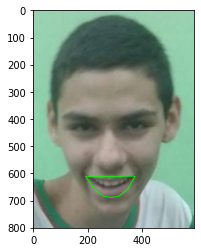

In [68]:
marcos_labio = [marcos_sorriso[0][48:61]]
plt.imshow(anotar_marcos_casca_convexa(sorriso.copy(), marcos_labio));
